# Insurance Company -- Customer Information Deep Dive

### Domain:

**Health care**

### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions




### Attribute Information: 

**age**     : age of primary beneficiary  
**sex**     : insurance contractor gender, female, male  
**bmi**     : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,               objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9  
**children**: Number of children covered by health insurance / Number of dependents  
**smoker**  : Smoking  
**region**  : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.  
**charges** : Individual medical costs billed by health insurance.   

## Objective

Derive useful bussiness insights from customer data 

## 1. Import the neccessary libraries

In [143]:
# Load the required python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## 2. Read the data as a data frame

In [144]:
# load the data of customer information of the insurance company 

custData = pd.read_csv("insurance.csv")

## 3. Perform Basic EDA 

### a. Shape of the data

In [145]:
# Output no.of rows, columns present in the data

custData.shape

(1338, 7)

In [146]:
# Glimpse of how the data looks

custData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### b. Data type of each attribute

In [147]:
# obtain the data type of each of the variables/attributes

custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### c. Checking the presence of missing values

In [148]:
# to check for missing values

custData.isnull().values.any()

False

**The above output suggest there are no missing values in the data.  
However, to validate, lets check for "how many missing values are present in the data across all attributes?"**

In [149]:
custData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**From the above two results, it is clear that the data doesnot have any missing values**

### d. 5 point summary of numerical attributes

In [150]:
# to find out the 5 point summary on nummerical attributes, 
# we have 4 numerical coloumns:  age, bmi, children, charges
# so we use include=np.number on descibe to get the summary of only these columns

# Note : We can also use : exclude=[np.object], to eliminate the non-numerical attributes
#custData.describe(exclude=[np.object])

custData.describe(include=[np.number])  

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284E27AEBE0>,
      dtype=object)

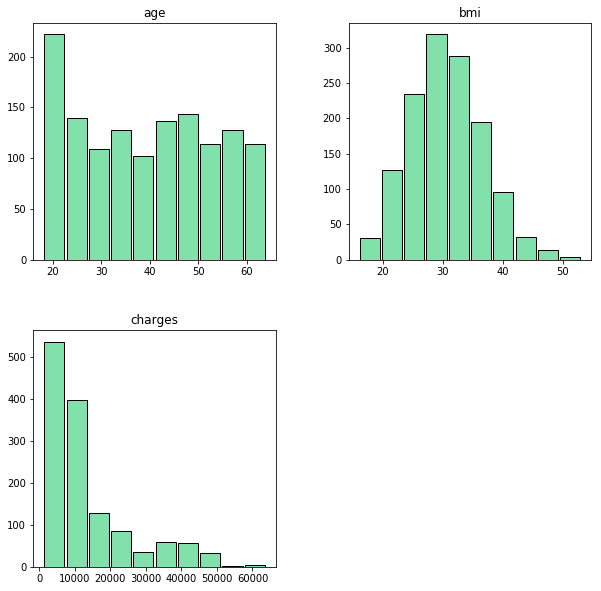

In [151]:
# columns for distrubution can be passed as sequence to column=<sequece/string>
# to remove grid line : grid=False (by default true)
# no.of bins : 10
# Size of the figure : 10x10
# color of bin: #82E0AA

custData.hist(column=['bmi','age','charges'], grid=False, bins=10, figsize=(10,10), color="#82E0AA", edgecolor = 'black', rwidth=0.9)

**From the above historgram distrubutions we can deduce that**     
**1. age is more or less uniformly distrubuted**  
**2. bmi is normaly distrubuted**  
**3. Charges is highly skewed to left.**

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

Skewness of charges is : 1.5158796580240388


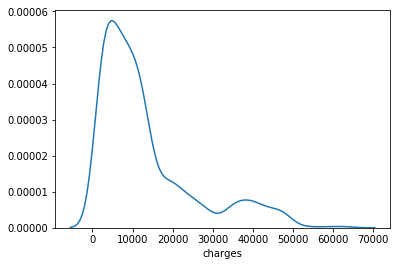

Skewness of bmi is : 0.2840471105987448


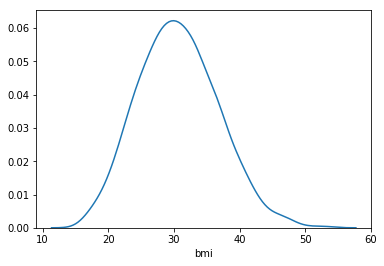

Skewness of age is : 0.05567251565299186


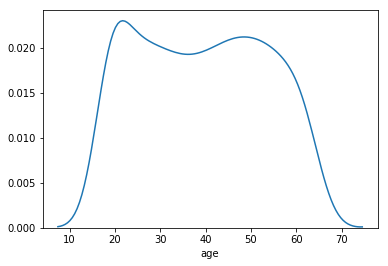

In [152]:
# to measure the skewness, 
charges_skew=custData['charges'].skew()
bmi_skew = custData['bmi'].skew()
age_skew = custData['age'].skew()

sns.distplot(custData['charges'], hist=False)
print("Skewness of charges is :", charges_skew)
plt.show()

sns.distplot(custData['bmi'], hist=False)
print("Skewness of bmi is :", bmi_skew)
plt.show()

sns.distplot(custData['age'], hist=False)
print("Skewness of age is :", age_skew)
plt.show()

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

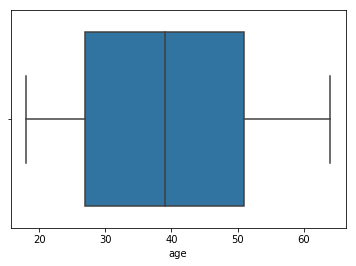

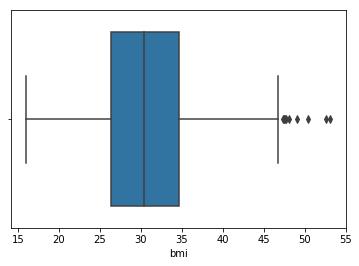

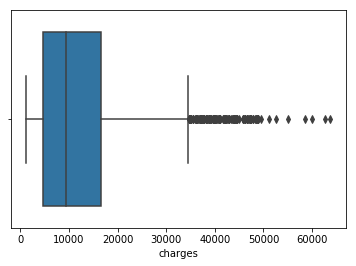

In [153]:
sns.boxplot(x='age',data=custData)
plt.show()
sns.boxplot(x='bmi', data=custData)
plt.show()
sns.boxplot(x='charges', data=custData)
plt.show()

**From the above box plots, we notice**    
**age : no outliers**  
**bmi : has few outliers**  
**charges: has very high no.of outliers due to its high skewness**  

### h. Distribution of categorical columns

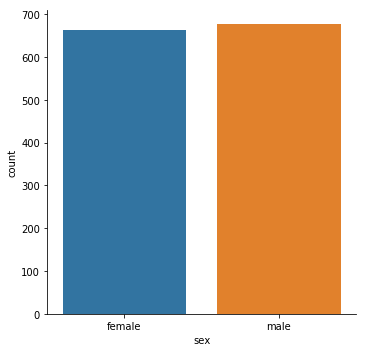

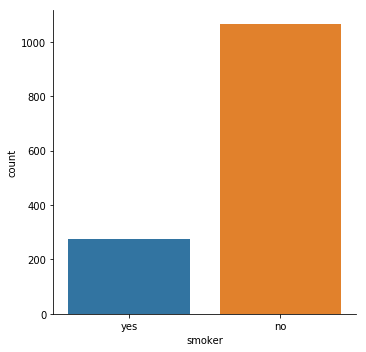

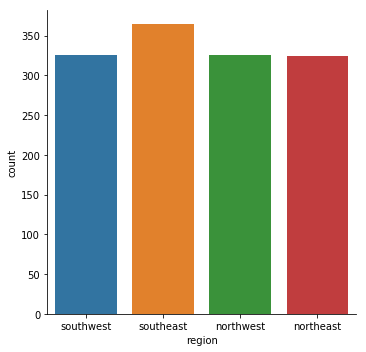

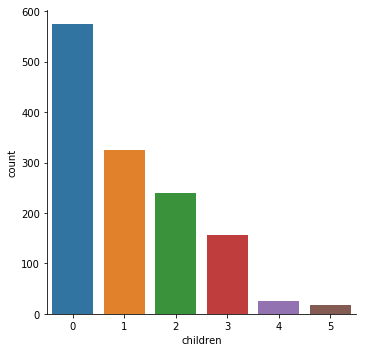

In [154]:
# First lets do a count plot acorss all the categorical attributes
sns.catplot(x="sex", kind="count", data=custData);
plt.show()

sns.catplot(x="smoker", kind="count", data=custData);
plt.show()

sns.catplot(x="region", kind="count", data=custData);
plt.show()

sns.catplot(x="children", kind="count", data=custData);
plt.show()

**Deductions from above categorical distrubutions**  
**1. Data is evenly distrubuted w.r.t to 'sex'**  
**2. There are fairly more no.of non-smokers than smokers in the customer data**  
**3. The customers are more or less evenly spread across various regions**  
**4. There appears to be more no. of people with less than 2 children**  

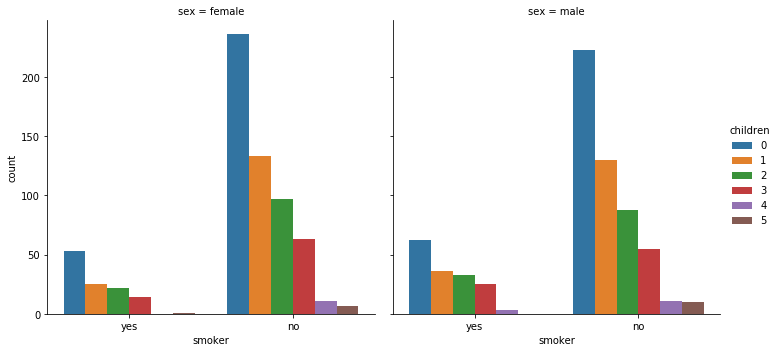

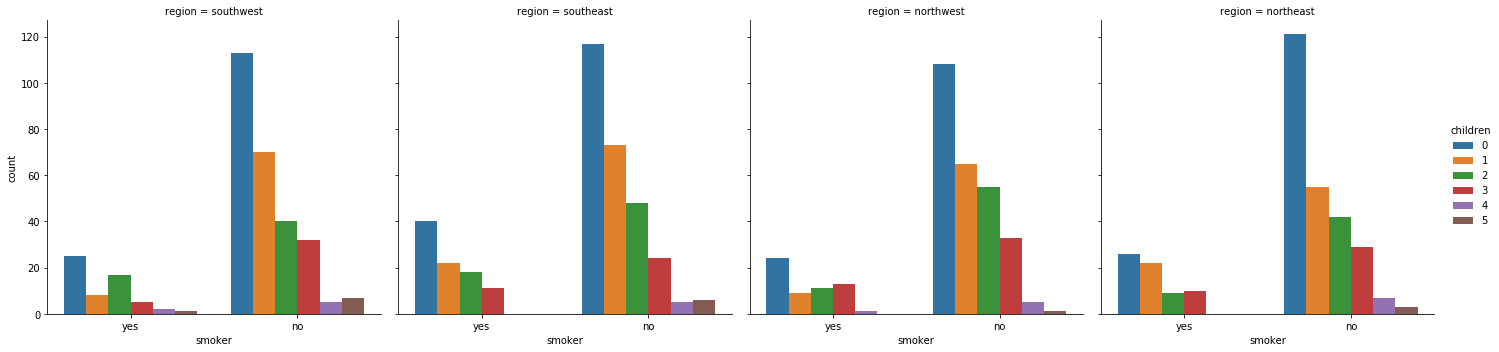

In [155]:
# now, lets see how many smokers are classifed into male/female with no.of children as hue
sns.catplot(x="smoker",
               col="sex",
               hue="children",
               data=custData,
               kind="count"
)
plt.show()

# now, lets how many smokers are classifed based on region with no.of children as hue
sns.catplot(x="smoker",
               col="region",
               hue="children",
               data=custData,
               kind="count"
)
plt.show()

### i. Pair plot that includes all the columns of the data frame 

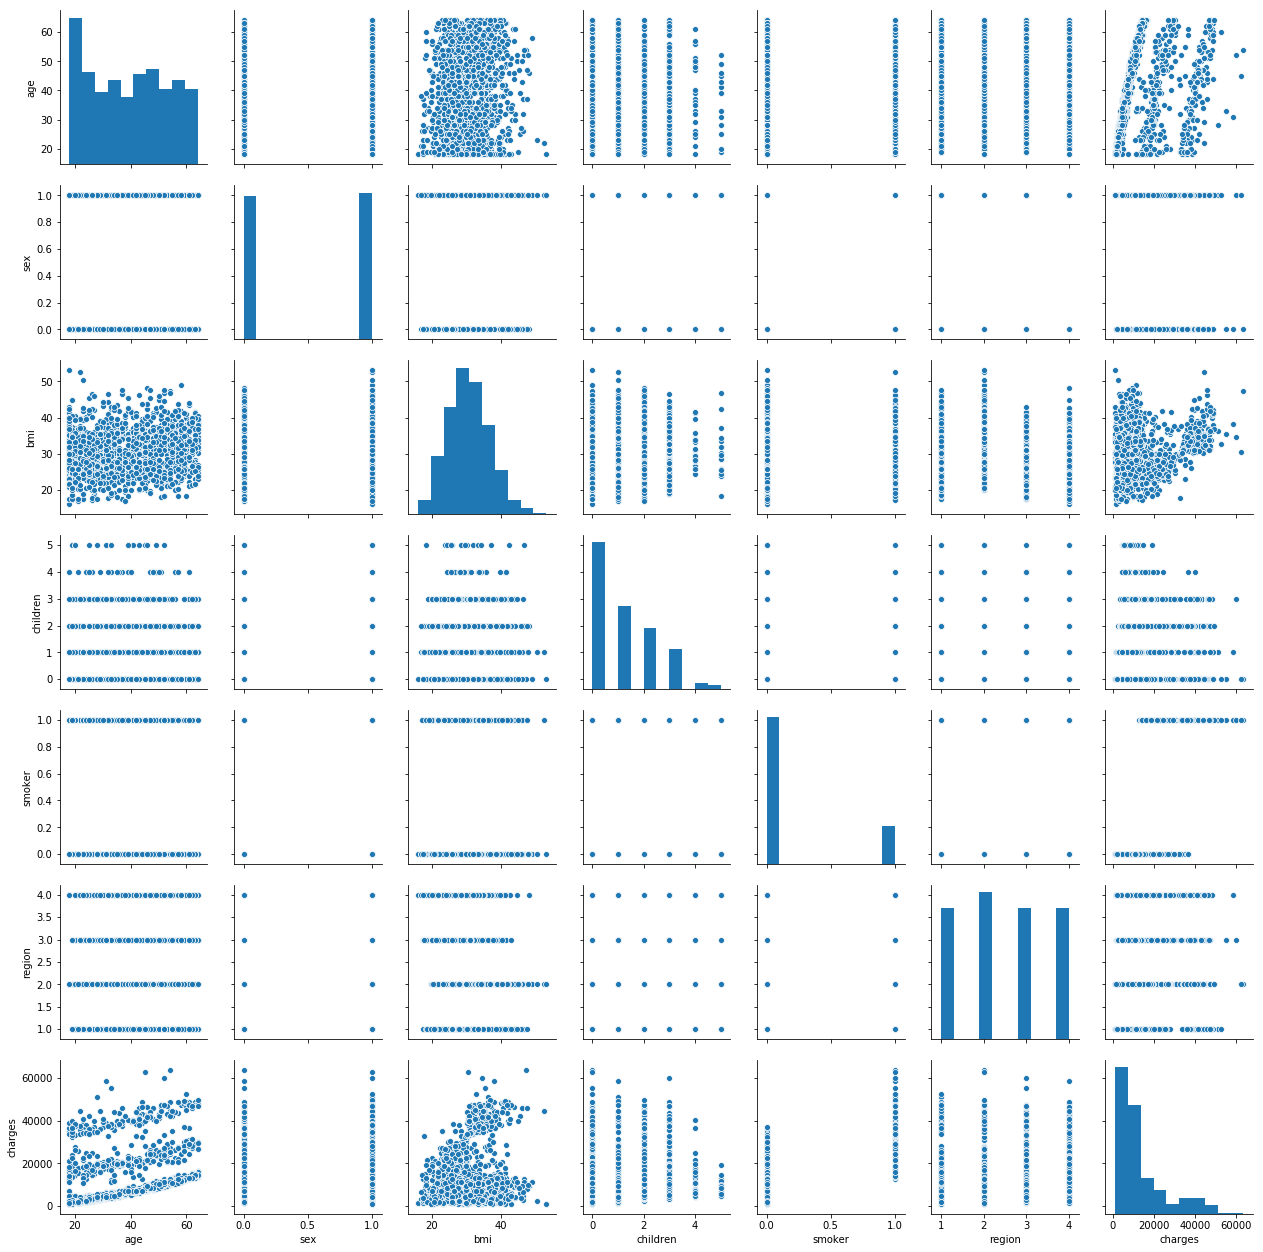

In [156]:
# The data here contains categorical attributes which will be ingnored during pair plot.
# so inorder to include all the columns into pari plot, we encode the categorical variables.

# Since, we donot want to disturb the currrent data, we take a copy of the dataframe.
custData_enc = custData.copy(deep=True)

# lets no create a map for encoding 'sex' column. wherin 'female' = 0 and 'male' = 1
sex_map= {'female':0, 'male':1}

# apply the map on the copy of the dataframe 'custData_enc'
custData_enc['sex'] = custData_enc['sex'].map(sex_map)

# lets no create a map for encoding 'region' column. 
region_map = {'southwest': 1, 'southeast':2, 'northwest':3, 'northeast':4}
custData_enc['region'] = custData_enc['region'].map(region_map)

# lets no create a map for encoding 'smoker' column.
smoker_map = {'yes': 1, 'no':0}
custData_enc['smoker'] = custData_enc['smoker'].map(smoker_map)


#Now plot the pair plot using the enocoded data to include all the columns
sns.pairplot(custData_enc)

**Important deductions**
1. Age and charges seems to have a positive correlation
2. Smokers tend to have higher charges than non-smokers

## 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

In [157]:
pd.pivot_table(custData,'charges', index=['smoker'], aggfunc=np.mean)


,charges
smoker,
no,8434.268298
yes,32050.231832


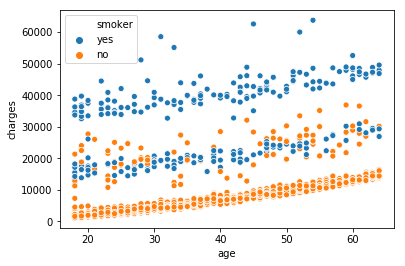

In [159]:
sns.scatterplot(x='age',y='charges',hue='smoker', data=custData)

**From the above two results, it is evident that charges for smokers are significantly higher when compared to that of non-smokers.**  

**However, lets perform a two sample t-test to deduce the dependency between smoker and charges.**  
**For this lets consider**  
**Ho= Charges for non-smoker and smoker are same**  
**Ha = Charges for smoker and non-smoker are not same**

**Lets assume a significane level of 5%** 
**i.e. if p_value < 0.05 then, we reject null hypothesis.**

In [160]:
# lets segregate the date into smoker and non-smokers
from scipy.stats import ttest_ind

s_charges = np.array(custData[custData['smoker']=='yes']['charges'])
ns_charges = np.array(custData[custData['smoker']=='no']['charges'])

t_statistic, p_value = ttest_ind(s_charges, ns_charges)
print ("t_statistic_value:",t_statistic)
print ("p_value:",p_value)

t_statistic_value: 46.664921172723716
p_value: 8.271435842177219e-283


**As we see the p_value is far below 0.05.**  
**Also, even with 1% significance, null hypothesis fails.**     
**Hence we determine that "Yes. charges of people who smoke differ significantly from the people who don't"**  

### b.Does bmi of males differ significantly from that of females?

In [161]:
pd.pivot_table(custData,'bmi', index=['sex'], aggfunc=np.mean)

,bmi
sex,
female,30.377749
male,30.943129


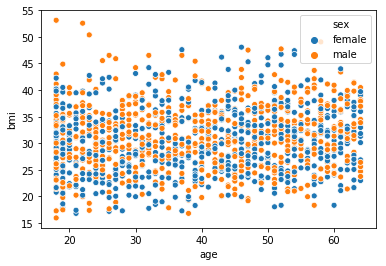

In [162]:
sns.scatterplot(x='age',y='bmi',hue='sex', data=custData)

**From the above two results, there is no clear dependancy w.r.t to 'sex' on bmi** 

**Hence lets peform a t-test to verify**  
**Let us assume, the null and alternate hypothesis and setup a significane level**  

**Ho= bmi is independant on sex(male/female)**  
**Ha= bmi is dependant of sex(male/female)**  

**Significance level : 5%**  


In [163]:
from scipy.stats import ttest_ind

m_bmi = np.array(custData[custData['sex']=='male']['bmi'])
f_bmi = np.array(custData[custData['sex']=='female']['bmi'])

t_statistic, p_value = ttest_ind(m_bmi,f_bmi)
print ("t_statistic_value:",t_statistic)
print ("p_value:",p_value)

t_statistic_value: 1.696752635752224
p_value: 0.08997637178984932


**As we see p_value > 0.05, null hypothesis holds.**  
**Hence we determine that, bmi is independant of male/female. i.e. bmi of males/females are identical**  

### c. Is the proportion of smokers significantly different in different genders?

In [164]:
pd.crosstab(custData['smoker'], custData['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


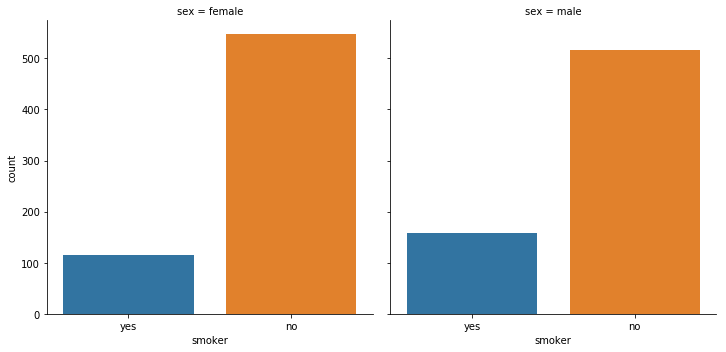

In [165]:
sns.catplot(x="smoker",
               col="sex",
               data=custData,
               kind="count"
)

**From the above two results, we notice there is a slight tendency of a higher proportion of male smokers than female smokers**  
**However, we verify using proportions test**  

**Ho = Proportions of smokers in male/female are equal**  
**Ha = Proportions of smokers in male/female are different**  

**Significane level : 5%**  


In [166]:
f_count=custData[custData['sex']=='female'].count()[0]
m_count = custData[custData['sex']=='male'].count()[0]

#print(f_count, m_count)

f_smokers = custData[(custData['sex'] == 'female') & (custData['smoker'] == 'yes')].count()[0]
m_smokers= custData[(custData['sex'] == 'male') & (custData['smoker'] == 'yes')].count()[0]

#print(f_smokers, m_smokers)

from statsmodels.stats.proportion import proportions_ztest

stat, p_value = proportions_ztest([f_smokers,m_smokers] , [f_count, m_count])

print("P value is :", p_value)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

if p_value < 0.05:
    printmd("**We reject the null.. (ie) Proportions of smokers in male/female is significantly different**")
else:
    printmd("**We fail to reject null.. (ie) Proportions of smokers in male/female are equal**")


P value is : 0.005324114164320532


**We reject the null.. (ie) Proportions of smokers in male/female is significantly different**

### d. Is the distribution of bmi across women with no children, one child and two children, the same?

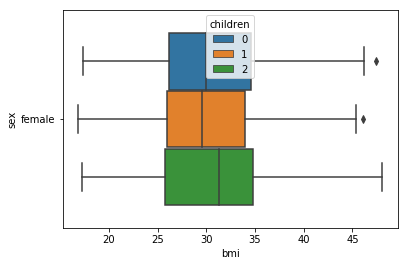

In [167]:
sampleData = custData[(custData['children'] .isin(['0','1','2'])) & (custData['sex'] .isin(['female'])) ]

sns.boxplot(y='sex', x='bmi', hue='children', data=sampleData)

In [168]:
pd.pivot_table(sampleData,'bmi', index=['sex','children'], aggfunc={np.mean,max,min})

max       mean     min
sex    children                          
female 0         47.41  30.361522  17.290
       1         46.09  30.052658  16.815
       2         48.07  30.649790  17.195

**From the above two results, we see that distrubution of bmi across women with 0, 1, and 2 children are very are close to each other.** 

**So lets perform test of variance of bmi across women with 0,1 and 2 children.**  

**Ho : Variation in bmi of women with 0/1/2 children is equal same  
  Ha : Variation in bmi of women with 0/1/2/ children is not same**
  
**Significane level : 5%**


In [170]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

custData_mod = custData[(custData['sex']=='female') & (custData['children'] .isin(['0','1','2']))]
#custData_mod.head()
 
mod = ols('bmi ~ children', data=custData_mod).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


**Since, we notice that the (p_value = 0.79)> 0.05, we fail to reject the Null hypothesis.**    
**Hence, Variation in bmi of women with 0/1/2 children is equal same. (ie)  
BMI is not changed by the number of children a women has**  